<a href="https://colab.research.google.com/github/teguica/LATIA112-2/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **資料集:大專校院各校科系別概況**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/")
!ls -l "/content/gdrive/My Drive/"

from matplotlib.font_manager import fontManager
import matplotlib as mpl
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

Mounted at /content/gdrive/
total 79374
-rw------- 1 root root  1032954 Apr  6 02:45  112_sdata.csv
-rw------- 1 root root   261032 Mar 26 07:30  112年12月_1752_111936.ods
-rw------- 1 root root    62526 Mar 22  2023  1679453568840.jpg
-rw------- 1 root root   495618 Jan  9  2019  20128.pdf
drwx------ 2 root root     4096 Mar 19 06:21  Ch12-16
drwx------ 2 root root     4096 Oct 18 07:50 'Colab Notebooks'
-rw------- 1 root root  2394695 Mar 26 07:34  opendata111v063.zip
drwx------ 2 root root     4096 Oct  3  2022  python
drwx------ 2 root root     4096 Sep 25  2022  result
-rw------- 1 root root 20659344 Jul  4  2019  TaipeiSansTCBeta-Regular.ttf
drwx------ 2 root root     4096 Feb 27 06:23  學習分析工具
-rw------- 1 root root      179 Mar 28  2023  學號測試.gform
-rw------- 1 root root  1027643 May 24  2023 '專題報告 5 25.pptx .pptx'
-rw------- 1 root root  1843915 Oct  7  2022 '專題第二組 報告(1).pptx'
-rw------- 1 root root  1843915 Nov 11  2022 '「專題第二組 報告(1).pptx」複本'
-rw------- 1 root root      179 Aug 

# **1:有幾間大學有開設電機工程學系(以圓餅圖標示)**

共有 33 間大學開設了電機工程學系
共有 115 間大學沒有開設


([<matplotlib.patches.Wedge at 0x7f1891ef0dc0>,
 [Text(-0.709051837478749, 0.8409788890144687, 'yes'),
  Text(0.7090517981096853, -0.8409789222075796, 'no')],
 [Text(-0.3867555477156812, 0.4587157576442556, '22.3%'),
  Text(0.3867555262416465, -0.4587157757495888, '77.7%')])

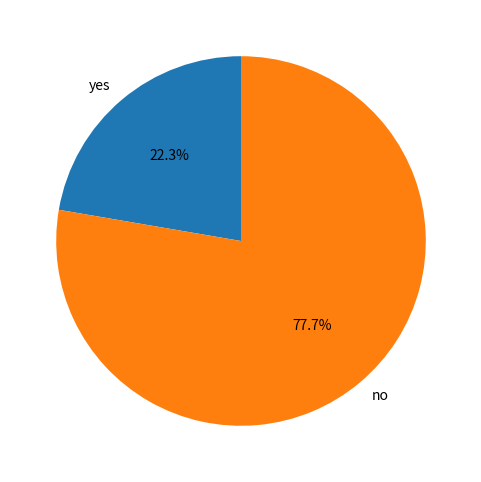

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
data = './112_sdata.csv'
df = pd.read_csv(data)

# 找出有"電機工程"的大學
EE_df = df[df['科系名稱'] == '電機工程學系']

# 去除重複的學校
EE_school = EE_df['學校名稱'].unique()

print(f"共有 {len(EE_school)} 間大學開設了電機工程學系")

EE_school = len(EE_school)
#計算其他大學的數量
other_school = len(df['學校名稱'].unique()) - EE_school
print(f"共有 {other_school} 間大學沒有開設")
# 繪製圓餅圖
plt.figure(figsize=(6, 6))
plt.pie([EE_school, other_school], labels=['yes', 'no'], autopct='%1.1f%%', startangle=90)

# **2:全台開設科系前五多的大學(以長條圖標示)**

學校名稱
國立高雄科技大學    176
國立臺灣大學      155
國立陽明交通大學    147
國立清華大學      120
國立成功大學      119
Name: 科系名稱, dtype: int64


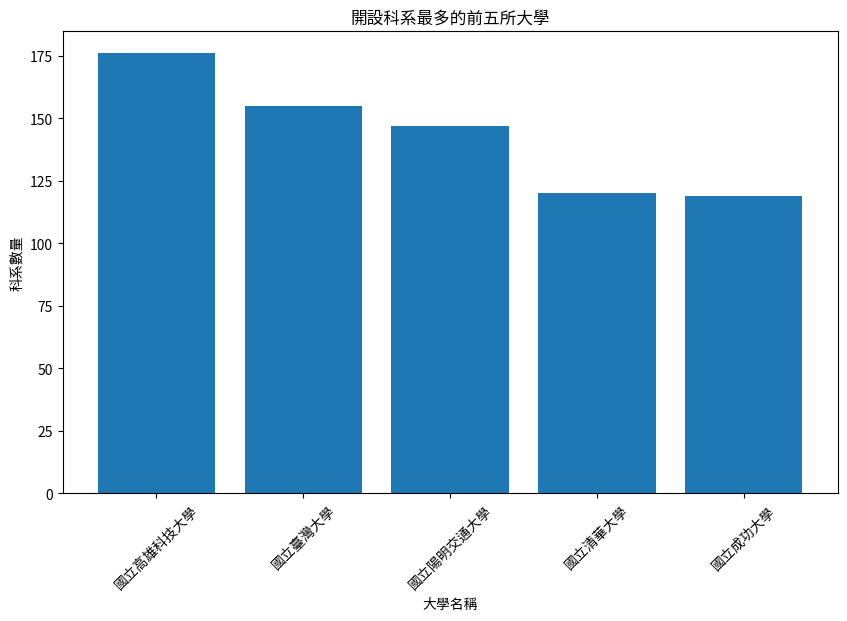

In [8]:

# 計算每間大學開設的科系數量
num = df.groupby('學校名稱')['科系名稱'].nunique()

# 找出前五所大學
most = num.nlargest(5)
print(most)
# 繪製長條圖

plt.figure(figsize=(10, 6))
plt.bar(most.index, most.values)
plt.xlabel('大學名稱')
plt.ylabel('科系數量')
plt.title('開設科系最多的前五所大學')
plt.xticks(rotation=45)
plt.show()


# **3:全台哪間大學的學生數最多；他們學士班、碩士班、博士班之間的比例(以圓餅圖標示)**

人最多的學校是國立臺灣大學，有33882個人


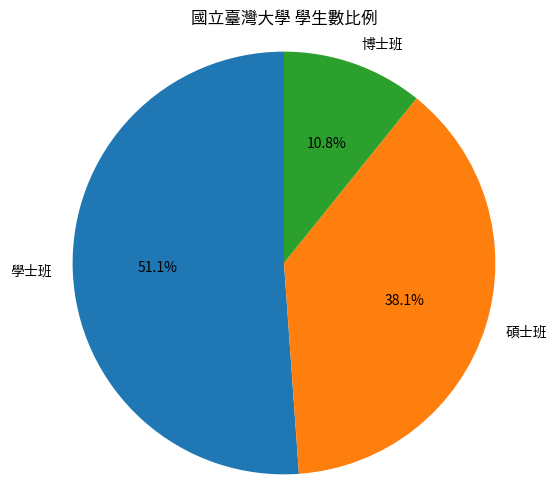

In [11]:

total = df.groupby('學校名稱')['學生數'].sum()

# 找出學生最多的
max_school = total.idxmax()
max_students = total.max()
print(f"人最多的學校是{max_school}，有{max_students}個人")
# 計算學士、碩士、博士總和
bachelor = df[(df['學校名稱'] == max_school) & (df['等級別'] == 'B 學士')]['學生數'].sum()
master = df[(df['學校名稱'] == max_school) & (df['等級別'] == 'M 碩士')]['學生數'].sum()
doctoral = df[(df['學校名稱'] == max_school) & (df['等級別'] == 'D 博士')]['學生數'].sum()

# 繪製圓餅圖
labels = ['學士班', '碩士班', '博士班']
sizes = [bachelor, master, doctoral]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'{max_school} 學生數比例')
plt.axis('equal')
plt.show()


# **4:老師最多以及最少的縣市分別是哪兩個，以及他們之間差了幾倍**

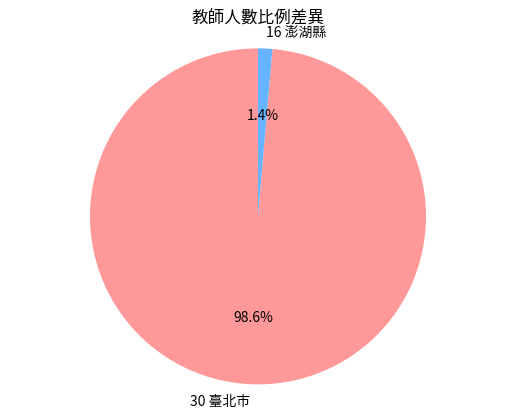

In [14]:

# 計算每個縣市的教師人數總和
teachers = df.groupby('縣市名稱')['教師數'].sum()

# 找出教師人數最多的縣市
max_teachers_county = teachers.idxmax()
max_teachers_count = teachers.max()

# 找出教師人數最少的縣市
min_teachers_county = teachers.idxmin()
min_teachers_count = teachers.min()

# 計算人數差距
difference = max_teachers_count / min_teachers_count

sizes = [max_teachers_count, min_teachers_count]
labels = [max_teachers_county, min_teachers_county]
# 繪製圓餅圖
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('教師人數比例差異')

# 顯示圖表
plt.axis('equal')
plt.show()

# **5:全台大學生有多少人是"工程"相關科系**

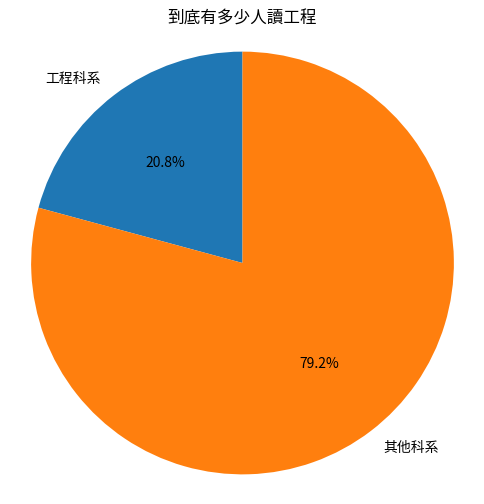

In [15]:
# 找出帶有"工程"的有多少人
engineering_df = df[df['科系名稱'].str.contains('工程')]
engineering_students = engineering_df['學生數'].sum()

# 計算其他科系的學生人數
other = df['學生數'].sum() - engineering_students

# 繪製圓餅圖
labels = ['工程科系', '其他科系']
sizes = [engineering_students, other]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('到底有多少人讀工程')
plt.axis('equal')
plt.show()

# **6:這些"工程"科系的學生中又有多少人學"電"**

In [17]:

# 找出帶有"工程"的有多少人
engineering_students = df[df["科系名稱"].str.contains("工程")]

# 其中包含"電"的
electrical_students = engineering_students[engineering_students["科系名稱"].str.contains("電")]

# 總學生數
total_students = len(electrical_students)

# 繪製圓餅圖
plt.pie([len(engineering_students), len(electrical_students)], labels=["工程", "有電的工程"], autopct='%1.1f%%', startangle=90)
plt.title('到底有多少人學電')

plt.axis('equal')
plt.show()


IndexError: invalid index to scalar variable.